# Part1: Gather

In [16]:
import pandas as pd
import numpy as np
import requests
import tweepy
import datetime
import seaborn as sns
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import re
import matplotlib.pyplot as plt

In [17]:
#Read csv file
df = pd.read_csv('twitter-archive-enhanced.csv')
#show the first 3 rows of data
df.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [18]:
# save the images link into URL variable 
url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
# Download the image file
response = requests.get(url) #use requests library
with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)    
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')#create images dataframe

In [19]:
#show the first 3 rows of image data
image_predictions.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [20]:
# replace the personal API keys with placeholders
consumer_key = 'Hidden'
consumer_secret = 'Hidden'
access_token = 'Hidden'
access_secret = 'Hidden'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [21]:
tweet_ids = df.tweet_id.values
len(tweet_ids)

2356

In [22]:
for tweet_id in df['tweet_id']:
    try:
        tweet = api.get_status(tweet_id, tweet_mode = 'extended')
        with open('tweet_json.txt', 'a+') as file:
            json.dump(tweet._json, file)
            file.write('\n')
        print (tweet_id, 'success')
    except Exception as e:
        print (tweet_id, 'Failed')
        print(e)

892420643555336193 success
892177421306343426 success
891815181378084864 success
891689557279858688 success
891327558926688256 success
891087950875897856 success
890971913173991426 success
890729181411237888 success
890609185150312448 success
890240255349198849 success
890006608113172480 success
889880896479866881 success
889665388333682689 success
889638837579907072 success
889531135344209921 success
889278841981685760 success
888917238123831296 success
888804989199671297 success
888554962724278272 success
888202515573088257 Failed
[{'code': 144, 'message': 'No status found with that ID.'}]
888078434458587136 success
887705289381826560 success
887517139158093824 success
887473957103951883 success
887343217045368832 success
887101392804085760 success
886983233522544640 success
886736880519319552 success
886680336477933568 success
886366144734445568 success
886267009285017600 success
886258384151887873 success
886054160059072513 success
885984800019947520 success
885528943205470208 succ

838561493054533637 success
838476387338051585 success
838201503651401729 success
838150277551247360 success
838085839343206401 success
838083903487373313 success
837820167694528512 success
837482249356513284 success
837471256429613056 success
837366284874571778 success
837110210464448512 success
837012587749474308 Failed
[{'code': 144, 'message': 'No status found with that ID.'}]
836989968035819520 success
836753516572119041 success
836677758902222849 success
836648853927522308 success
836397794269200385 success
836380477523124226 success
836260088725786625 success
836001077879255040 success
835685285446955009 success
835574547218894849 success
835536468978302976 success
835309094223372289 success
835297930240217089 success
835264098648616962 success
835246439529840640 success
835172783151792128 success
835152434251116546 success
834931633769889797 success
834786237630337024 success
834574053763584002 success
834477809192075265 success
834458053273591808 success
834209720923721728 succ

800188575492947969 success
800141422401830912 success
800018252395122689 success
799774291445383169 success
799757965289017345 success
799422933579902976 success
799308762079035393 success
799297110730567681 success
799063482566066176 success
798933969379225600 success
798925684722855936 success
798705661114773508 success
798701998996647937 success
798697898615730177 success
798694562394996736 success
798686750113755136 success
798682547630837760 success
798673117451325440 success
798665375516884993 success
798644042770751489 success
798628517273620480 success
798585098161549313 success
798576900688019456 success
798340744599797760 success
798209839306514432 success
797971864723324932 success
797545162159308800 success
797236660651966464 success
797165961484890113 success
796904159865868288 success
796865951799083009 success
796759840936919040 success
796563435802726400 success
796484825502875648 success
796387464403357696 success
796177847564038144 success
796149749086875649 success
7

760252756032651264 success
760190180481531904 success
760153949710192640 success
759943073749200896 success
759923798737051648 success
759846353224826880 success
759793422261743616 success
759566828574212096 success
759557299618865152 success
759447681597108224 success
759446261539934208 success
759197388317847553 success
759159934323924993 success
759099523532779520 success
759047813560868866 success
758854675097526272 success
758828659922702336 success
Rate limit reached. Sleeping for: 725
758740312047005698 success
758474966123810816 success
758467244762497024 success
758405701903519748 success
758355060040593408 success
758099635764359168 success
758041019896193024 success
757741869644341248 success
757729163776290825 success
757725642876129280 success
757611664640446465 success
757597904299253760 success
757596066325864448 success
757400162377592832 success
757393109802180609 success
757354760399941633 success
756998049151549440 success
756939218950160384 success
75665175279609446

718939241951195136 success
718631497683582976 success
718613305783398402 success
718540630683709445 success
718460005985447936 success
718454725339934721 success
718246886998687744 success
718234618122661888 success
717841801130979328 success
717790033953034240 success
717537687239008257 success
717428917016076293 success
717421804990701568 success
717047459982213120 success
717009362452090881 success
716802964044845056 success
716791146589110272 success
716730379797970944 success
716447146686459905 success
716439118184652801 success
716285507865542656 success
716080869887381504 success
715928423106027520 success
715758151270801409 success
715733265223708672 success
715704790270025728 success
715696743237730304 success
715680795826982913 success
715360349751484417 success
715342466308784130 success
715220193576927233 success
715200624753819648 success
715009755312439296 success
714982300363173890 success
714962719905021952 success
714957620017307648 success
714631576617938945 success
7

692919143163629568 success
692905862751522816 success
692901601640583168 success
692894228850999298 success
692828166163931137 success
692752401762250755 success
692568918515392513 success
692535307825213440 success
692530551048294401 success
692423280028966913 success
692417313023332352 success
692187005137076224 success
692158366030913536 success
692142790915014657 success
692041934689402880 success
692017291282812928 success
691820333922455552 success
691793053716221953 success
691756958957883396 success
691675652215414786 success
691483041324204033 success
691459709405118465 success
691444869282295808 success
691416866452082688 success
691321916024623104 success
691096613310316544 success
691090071332753408 success
690989312272396288 success
690959652130045952 success
690938899477221376 success
690932576555528194 success
690735892932222976 success
690728923253055490 success
690690673629138944 success
690649993829576704 success
690607260360429569 success
690597161306841088 success
6

677530072887205888 success
677335745548390400 success
677334615166730240 success
677331501395156992 success
677328882937298944 success
677314812125323265 success
677301033169788928 success
677269281705472000 success
677228873407442944 success
677187300187611136 success
Rate limit reached. Sleeping for: 724
676975532580409345 success
676957860086095872 success
676949632774234114 success
676948236477857792 success
676946864479084545 success
676942428000112642 success
676936541936185344 success
676916996760600576 success
676897532954456065 success
676864501615042560 success
676821958043033607 success
676819651066732545 success
676811746707918848 success
676776431406465024 success
676617503762681856 success
676613908052996102 success
676606785097199616 success
676603393314578432 success
676593408224403456 success
676590572941893632 success
676588346097852417 success
676582956622721024 success
676575501977128964 success
676533798876651520 success
676496375194980353 success
67647063908410163

670780561024270336 success
670778058496974848 success
670764103623966721 success
670755717859713024 success
670733412878163972 success
670727704916926465 success
670717338665226240 success
670704688707301377 success
670691627984359425 success
670679630144274432 success
670676092097810432 success
670668383499735048 success
670474236058800128 success
670468609693655041 success
670465786746662913 success
670452855871037440 success
670449342516494336 success
670444955656130560 success
670442337873600512 success
670435821946826752 success
670434127938719744 success
670433248821026816 success
670428280563085312 success
670427002554466305 success
670421925039075328 success
670420569653809152 success
670417414769758208 success
670411370698022913 success
670408998013820928 success
670403879788544000 success
670385711116361728 success
670374371102445568 success
670361874861563904 success
670338931251150849 success
670319130621435904 success
670303360680108032 success
670290420111441920 success
6

In [23]:
#add all id&retweet&favorate information into list named tweets
tweets = [] #Tweets list
with open('tweet_json.txt', 'r') as file:
    t1 = file.readlines()
    for i in range(len(t1)):
        tweet = [] #tweet list
        tweet.append(json.loads(t1[i])['id']) 
        tweet.append(json.loads(t1[i])['retweet_count'])
        tweet.append(json.loads(t1[i])['favorite_count'])
        #append tweets list with the information above
        tweets.append(tweet)

In [24]:
#save all information into df2 data frame 
var = ['id', 'retweet_count', 'favorite_count']
df2 = pd.DataFrame(tweets, columns = var)
#show the first 3 with thier id & retweet_count & favorite_count
df2.head(3)

,id,retweet_count,favorite_count
0,892420643555336193,8307,37995
1,892177421306343426,6135,32623
2,891815181378084864,4060,24549


# Part2: Assess

In [25]:
#show first 3 samples of data
df.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
878,760656994973933572,NaN,NaN,2016-08-03 02:02:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rose. Her face is stuck like that. 11/...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/760656994...,11,10,Rose,None,None,None,None
347,831911600680497154,NaN,NaN,2017-02-15 17:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Kuyu. He was trapped in a well for 10 day...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/831911600...,14,10,Kuyu,None,None,None,None
282,839239871831150596,NaN,NaN,2017-03-07 22:22:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Odie. He's big. 13/10 would attempt to...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/839239871...,13,10,Odie,None,None,None,None


In [26]:
#show the infromation for df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [27]:
#show the statical information
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [28]:
#find if there is any duplicated values
df.duplicated().sum()

0

In [29]:
#show the number of each dog type in our data
df['name'].value_counts()[:10]

None       745
a           55
Charlie     12
Oliver      11
Lucy        11
Cooper      11
Penny       10
Lola        10
Tucker      10
Bo           9
Name: name, dtype: int64

In [30]:
#show first 3 samples of image data
image_predictions.sample(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1003,708834316713893888,https://pbs.twimg.com/media/CdZI_bpWEAAm1fs.jpg,1,Eskimo_dog,0.283945,True,giant_panda,0.218252,False,malamute,0.180401,True
1994,874057562936811520,https://pbs.twimg.com/media/DCFGtdoXkAEsqIw.jpg,1,flat-coated_retriever,0.832177,True,black-and-tan_coonhound,0.040437,True,Newfoundland,0.028228,True
59,667119796878725120,https://pbs.twimg.com/media/CUIV6F7XIAA1tAM.jpg,1,Pembroke,0.741563,True,Chihuahua,0.057866,True,toy_poodle,0.039125,True


In [31]:
#show the information of image data
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [32]:
#show the statical information
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [33]:
image_predictions.duplicated().sum()

0

In [34]:
#the information of df2"retweet,favorite, and id"
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3360 entries, 0 to 3359
Data columns (total 3 columns):
id                3360 non-null int64
retweet_count     3360 non-null int64
favorite_count    3360 non-null int64
dtypes: int64(3)
memory usage: 78.8 KB


In [35]:
#show the statical information of df2
df2.describe()

,id,retweet_count,favorite_count
count,3.360000e+03,3360.000000,3360.000000
mean,7.783685e+17,3814.939881,12024.471726
std,7.996438e+16,5424.166330,15537.360127
min,6.660209e+17,0.000000,0.000000
25%,6.910649e+17,781.250000,1684.000000
50%,7.899319e+17,2189.000000,5900.500000
75%,8.558265e+17,4723.500000,19153.750000
max,8.924206e+17,83482.000000,164037.000000


## Quality

- The timestamp must be datetime
- The retweeted_status_timestamp must be datetime
- Rewrite the tweet source, from iphone ,web...etc
- Remove the tweets without images and only keep the tweets with images
- Remove retweets
- Some incorrect dog names
- Retweeted data included in df
- There is some missing values in name columns 'None'
- IDs should be sting type
- Replies are included df



## Tidiness

- Merge df2 and image_predictions to df1
- There is must be (Dog Stages) coulmn that include (doggo, floofer, pupper, and puppo) as a single column

# Part3:Clean

- Create a copy of each dataframe

In [36]:
df_clean = df.copy()#twitter_archive_copy(Cleand)

In [37]:
image_predictions_clean = image_predictions.copy()#image_predictions_copy(Cleand)

In [38]:
df2_clean = df2.copy()#Tweet_json_copy(Cleand)

In [39]:
#show info
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

- merge dataframes

In [40]:
df_clean = pd.merge(left=df_clean, right=df2_clean, left_on='tweet_id', right_on='id', how='inner')

In [41]:
df_clean = df_clean.merge(image_predictions_clean, on='tweet_id', how='inner')

In [42]:
df_clean = df_clean.drop('id', axis=1)

In [43]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2901 entries, 0 to 2900
Data columns (total 30 columns):
tweet_id                      2901 non-null int64
in_reply_to_status_id         30 non-null float64
in_reply_to_user_id           30 non-null float64
timestamp                     2901 non-null object
source                        2901 non-null object
text                          2901 non-null object
retweeted_status_id           116 non-null float64
retweeted_status_user_id      116 non-null float64
retweeted_status_timestamp    116 non-null object
expanded_urls                 2901 non-null object
rating_numerator              2901 non-null int64
rating_denominator            2901 non-null int64
name                          2901 non-null object
doggo                         2901 non-null object
floofer                       2901 non-null object
pupper                        2901 non-null object
puppo                         2901 non-null object
retweet_count                 29

- Convert timestamp to datetime in Twitter archive

In [44]:
#Convert timestamp to datetime
df_clean.timestamp = pd.to_datetime(df_clean.timestamp)

In [45]:
#Show the first 3 rows of df_clean after convert the time into datetime
df_clean.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False
1,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False
2,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False


- Convert retweeted_status_timestamp to datetime

In [46]:
#Convert retweeted_status_timestamp to datetime
df_clean.retweeted_status_timestamp = pd.to_datetime(df_clean.retweeted_status_timestamp)

- Remove the tweets without images and only keep the tweets with images

In [47]:
#remove the NaN value rows 
df_clean = df_clean[df_clean.expanded_urls.notnull()]
#test the information after the droped values
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2901 entries, 0 to 2900
Data columns (total 30 columns):
tweet_id                      2901 non-null int64
in_reply_to_status_id         30 non-null float64
in_reply_to_user_id           30 non-null float64
timestamp                     2901 non-null datetime64[ns]
source                        2901 non-null object
text                          2901 non-null object
retweeted_status_id           116 non-null float64
retweeted_status_user_id      116 non-null float64
retweeted_status_timestamp    116 non-null datetime64[ns]
expanded_urls                 2901 non-null object
rating_numerator              2901 non-null int64
rating_denominator            2901 non-null int64
name                          2901 non-null object
doggo                         2901 non-null object
floofer                       2901 non-null object
pupper                        2901 non-null object
puppo                         2901 non-null object
retweet_count   

- Convert the source form URL into readable text

In [48]:
#How it's look before as url
df_clean['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2856
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       35
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      10
Name: source, dtype: int64

In [49]:
#convert each link into readable text
df_clean.source = df_clean.source.str.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for iPhone')
df_clean.source = df_clean.source.str.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>','Vine - Make a Scene')
df_clean.source = df_clean.source.str.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>','Twitter Web Client')
df_clean.source = df_clean.source.str.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>','TweetDeck')

In [50]:
#show the source after converting
df_clean['source'].value_counts()

Twitter for iPhone    2856
Twitter Web Client      35
TweetDeck               10
Name: source, dtype: int64

In [51]:
#test
df_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
2,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
3,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
4,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
5,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
6,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
7,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
8,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
9,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


- Change IDs to String Type

In [52]:
df_clean['tweet_id'] = df_clean['tweet_id'].astype('str')
df_clean['in_reply_to_status_id'] = df_clean['in_reply_to_status_id'].astype('str')
df_clean['in_reply_to_user_id'] = df_clean['in_reply_to_user_id'].astype('str')

In [53]:
#check the change
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2901 entries, 0 to 2900
Data columns (total 30 columns):
tweet_id                      2901 non-null object
in_reply_to_status_id         2901 non-null object
in_reply_to_user_id           2901 non-null object
timestamp                     2901 non-null datetime64[ns]
source                        2901 non-null object
text                          2901 non-null object
retweeted_status_id           116 non-null float64
retweeted_status_user_id      116 non-null float64
retweeted_status_timestamp    116 non-null datetime64[ns]
expanded_urls                 2901 non-null object
rating_numerator              2901 non-null int64
rating_denominator            2901 non-null int64
name                          2901 non-null object
doggo                         2901 non-null object
floofer                       2901 non-null object
pupper                        2901 non-null object
puppo                         2901 non-null object
retweet_count

- Remove the retweets from df

In [54]:
# remove the retweets
df_clean = df_clean[df_clean['retweeted_status_id'].isnull()]
#test
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2785 entries, 0 to 2900
Data columns (total 30 columns):
tweet_id                      2785 non-null object
in_reply_to_status_id         2785 non-null object
in_reply_to_user_id           2785 non-null object
timestamp                     2785 non-null datetime64[ns]
source                        2785 non-null object
text                          2785 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 2785 non-null object
rating_numerator              2785 non-null int64
rating_denominator            2785 non-null int64
name                          2785 non-null object
doggo                         2785 non-null object
floofer                       2785 non-null object
pupper                        2785 non-null object
puppo                         2785 non-null object
retweet_count      

- Drop Retweeted columns informations

In [55]:
#The retweete columns 
retValue = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']

In [56]:
#Drop The retweeted columns
df_clean = df_clean.drop(retValue, axis=1)

In [57]:
#test
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2785 entries, 0 to 2900
Data columns (total 27 columns):
tweet_id                 2785 non-null object
in_reply_to_status_id    2785 non-null object
in_reply_to_user_id      2785 non-null object
timestamp                2785 non-null datetime64[ns]
source                   2785 non-null object
text                     2785 non-null object
expanded_urls            2785 non-null object
rating_numerator         2785 non-null int64
rating_denominator       2785 non-null int64
name                     2785 non-null object
doggo                    2785 non-null object
floofer                  2785 non-null object
pupper                   2785 non-null object
puppo                    2785 non-null object
retweet_count            2785 non-null int64
favorite_count           2785 non-null int64
jpg_url                  2785 non-null object
img_num                  2785 non-null int64
p1                       2785 non-null object
p1_conf         

- Make single column for doggo, floofer, pupper, and puppo

In [58]:
#Create new column that include doggo,floofer,pupper,puppo
df_clean['dog_stages'] = df_clean['text'].str.extract('(doggo|floofer|pupper|puppo)', expand=True)

In [59]:
#drop doggo column
df_clean = df_clean.drop('doggo', axis=1)

In [60]:
#drop floofer column
df_clean = df_clean.drop('floofer', axis=1)

In [61]:
#Drop pupper column
df_clean = df_clean.drop('pupper', axis=1)

In [62]:
#Drop puppor column
df_clean = df_clean.drop('puppo', axis=1)

In [63]:
df_clean.sample(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stages
66,889638837579907072,nan,nan,2017-07-25 00:10:02,Twitter for iPhone,This is Ted. He does his best. Sometimes that'...,https://twitter.com/dog_rates/status/889638837...,12,10,Ted,...,French_bulldog,0.991650,True,boxer,0.002129,True,Staffordshire_bullterrier,0.001498,True,NaN
592,862096992088072192,nan,nan,2017-05-10 00:08:34,Twitter for iPhone,We only rate dogs. Please don't send perfectly...,https://twitter.com/dog_rates/status/862096992...,13,10,None,...,chow,0.677589,True,Pomeranian,0.270648,True,Pekinese,0.038110,True,NaN


In [64]:
#change the dog_stages format to category
df_clean.dog_stages = df_clean.dog_stages.astype('category')
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2785 entries, 0 to 2900
Data columns (total 24 columns):
tweet_id                 2785 non-null object
in_reply_to_status_id    2785 non-null object
in_reply_to_user_id      2785 non-null object
timestamp                2785 non-null datetime64[ns]
source                   2785 non-null object
text                     2785 non-null object
expanded_urls            2785 non-null object
rating_numerator         2785 non-null int64
rating_denominator       2785 non-null int64
name                     2785 non-null object
retweet_count            2785 non-null int64
favorite_count           2785 non-null int64
jpg_url                  2785 non-null object
img_num                  2785 non-null int64
p1                       2785 non-null object
p1_conf                  2785 non-null float64
p1_dog                   2785 non-null bool
p2                       2785 non-null object
p2_conf                  2785 non-null float64
p2_dog          

In [65]:
df_clean.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stages
0,892420643555336193,nan,nan,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False,NaN
1,892420643555336193,nan,nan,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False,NaN
2,892420643555336193,nan,nan,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False,NaN


In [66]:
#show a sample of text for names
df_clean[['text', 'name']].sample(10)

,text,name
268,Ugh not again. We only rate dogs. Please don't...,None
1183,This is Chloe. She fell asleep at the wheel. A...,Chloe
1874,This is Staniel. His selfie game is strong af....,Staniel
287,This is Romeo. He would like to do an entrance...,Romeo
1010,This is Leo. He was a skater pup. She said see...,Leo
433,This is Harry. His ears are activated one at a...,Harry
670,This is Oscar and Oliver. Oliver shrunk Oscar....,Oscar
328,This is Emmy. She was adopted today. Massive r...,Emmy
483,This is Scout. He just graduated. Officially a...,Scout
1825,This is Ebby. She's a Zimbabwean Feta. Embarra...,Ebby


# Part4: Store

In [67]:
#Store the cleaned data into new csv named "twitter_archive_master.csv"
df_clean.to_csv('twitter_archive_master.csv', index=False)

# Part5: Analysis

In [68]:
df_clean.describe()

,rating_numerator,rating_denominator,retweet_count,favorite_count,img_num,p1_conf,p2_conf,p3_conf
count,2785.000000,2785.000000,2785.000000,2785.000000,2785.000000,2785.000000,2.785000e+03,2.785000e+03
mean,12.371634,10.402513,3628.943627,13647.961939,1.240934,0.606355,1.337319e-01,5.938903e-02
std,35.142078,6.300765,5254.869730,16005.227856,0.615687,0.270426,1.015551e-01,5.057507e-02
min,0.000000,2.000000,12.000000,78.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,10.000000,10.000000,825.000000,2622.000000,1.000000,0.372776,5.133470e-02,1.539440e-02
50%,12.000000,10.000000,2142.000000,8266.000000,1.000000,0.610499,1.157440e-01,4.866580e-02
75%,13.000000,10.000000,4400.000000,20782.000000,1.000000,0.856789,1.939050e-01,9.105510e-02
max,1776.000000,170.000000,83482.000000,164037.000000,4.000000,1.000000,4.880140e-01,2.734190e-01


#### - Retweet count Histogram

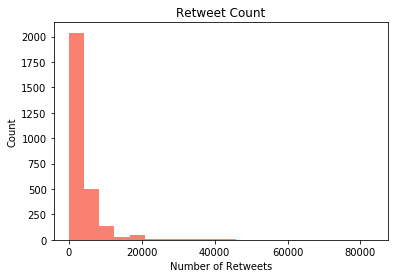

In [69]:
#Show the retweet count histogram
plt.hist(df_clean['retweet_count'], bins = 20, color='salmon')
plt.title("Retweet Count")
plt.xlabel("Number of Retweets")
plt.ylabel("Count")
#Display the plot
plt.show()

#### - Favorites count Histogram

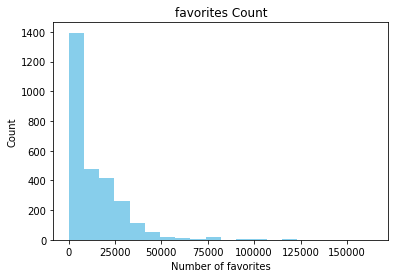

In [70]:
plt.hist(df_clean['favorite_count'], bins = 20, color='skyblue')
plt.title("favorites Count")
plt.xlabel("Number of favorites")
plt.ylabel("Count")
#Display the plot
plt.show()

#### -show retweet count based on time

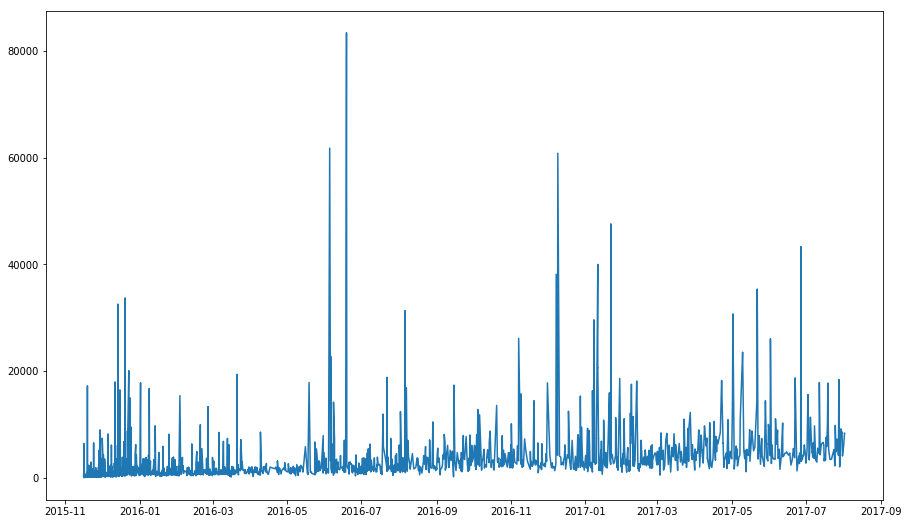

In [71]:
sns.set_context()
plt.subplots(figsize=(15, 9))
#the cleaned time and retweet count information showen in plot
plt.plot(df_clean.timestamp, df_clean.retweet_count);

#### -show favorite count based on time

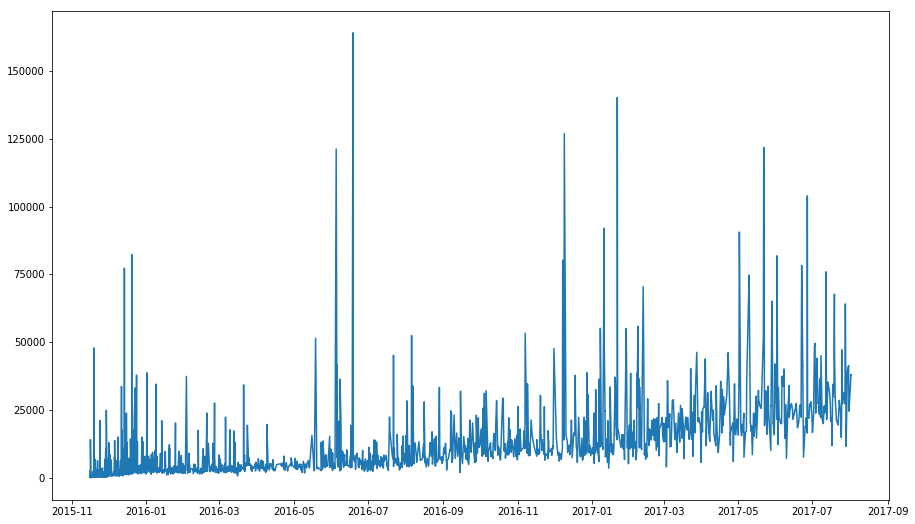

In [72]:
sns.set_context()
plt.subplots(figsize=(15, 9))
#the cleaned time and retweet count information showen in plot
plt.plot(df_clean.timestamp, df_clean.favorite_count);

In [73]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255